   pizza_id  order_id  pizza_name_id  quantity order_date order_time  \
0       1.0       1.0     hawaiian_m       1.0   1/1/2015   11:38:36   
1       2.0       2.0  classic_dlx_m       1.0   1/1/2015   11:57:40   
2       3.0       2.0  five_cheese_l       1.0   1/1/2015   11:57:40   
3       4.0       2.0    ital_supr_l       1.0   1/1/2015   11:57:40   
4       5.0       2.0     mexicana_m       1.0   1/1/2015   11:57:40   

   unit_price  total_price pizza_size pizza_category  \
0       13.25        13.25          M        Classic   
1       16.00        16.00          M        Classic   
2       18.50        18.50          L         Veggie   
3       20.75        20.75          L        Supreme   
4       16.00        16.00          M         Veggie   

                                   pizza_ingredients  \
0           Sliced Ham, Pineapple, Mozzarella Cheese   
1  Pepperoni, Mushrooms, Red Onions, Red Peppers,...   
2  Mozzarella Cheese, Provolone Cheese, Smoked Go...   
3  Cal

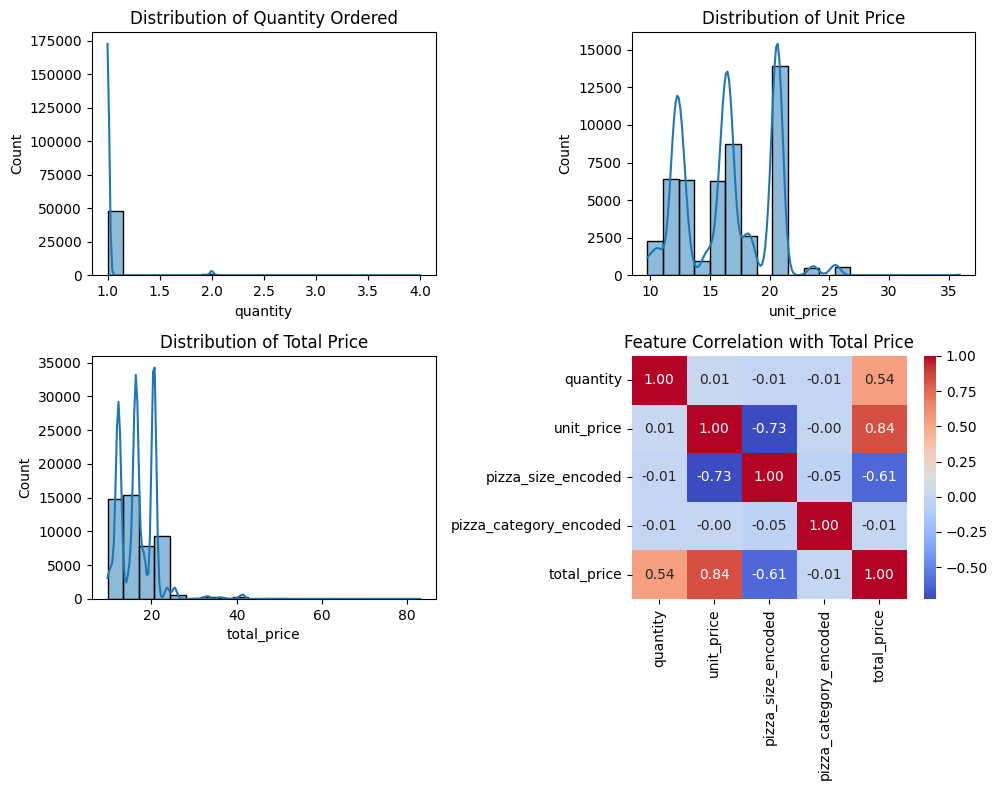

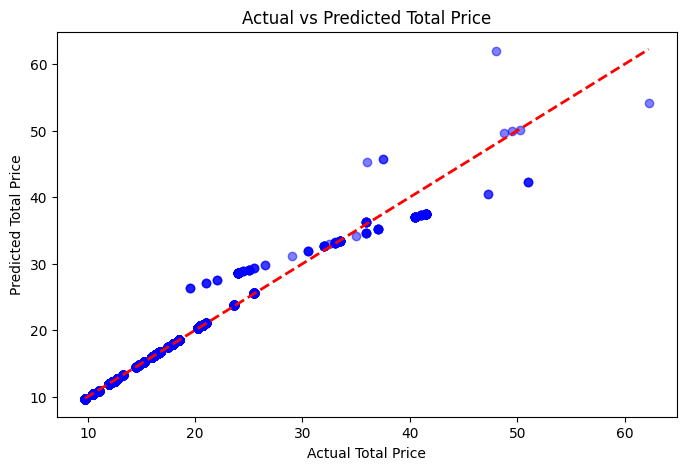

In [22]:
# Step 1: Import Library
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns

# Step 2: Load the dataset
file_path = 'pizza_sales.csv'  # Pastikan file CSV ada di folder yang sama
data = pd.read_csv(file_path)
print(data.head())

# Step 3: Data Preprocessing
# Drop rows with missing values for simplicity
data = data.dropna()

# Encode categorical variables (e.g., 'pizza_size', 'pizza_category')
label_encoder = LabelEncoder()
data['pizza_size_encoded'] = label_encoder.fit_transform(data['pizza_size'])
data['pizza_category_encoded'] = label_encoder.fit_transform(data['pizza_category'])

# Select features and target variable for prediction
X = data[['quantity', 'unit_price', 'pizza_size_encoded', 'pizza_category_encoded']]
y = data['total_price']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 4: Model Creation and Training
model = LinearRegression()
model.fit(X_train, y_train)

# Step 5: Prediction and Evaluation
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error (MSE):", mse)

# Step 6: Additional Analysis with Visualization

# Set up the figure size for all plots
plt.figure(figsize=(10, 8))

# 1. Distribution of Quantity
plt.subplot(2, 2, 1)
sns.histplot(data['quantity'], kde=True, bins=20)
plt.title('Distribution of Quantity Ordered')

# 2. Distribution of Unit Price
plt.subplot(2, 2, 2)
sns.histplot(data['unit_price'], kde=True, bins=20)
plt.title('Distribution of Unit Price')

# 3. Distribution of Total Price
plt.subplot(2, 2, 3)
sns.histplot(data['total_price'], kde=True, bins=20)
plt.title('Distribution of Total Price')

# 4. Correlation Heatmap
plt.subplot(2, 2, 4)
correlation_matrix = data[['quantity', 'unit_price', 'pizza_size_encoded', 'pizza_category_encoded', 'total_price']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Feature Correlation with Total Price')

plt.tight_layout()
plt.show()

# Visualizing Prediction Results
plt.figure(figsize=(8, 5))
plt.scatter(y_test, y_pred, alpha=0.5, color="blue")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel("Actual Total Price")
plt.ylabel("Predicted Total Price")
plt.title("Actual vs Predicted Total Price")
plt.show()
